Import necessary modules.

In [52]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

%matplotlib inline

Helper methods.

In [53]:
cricket_data = pd.read_csv('datacsv.csv')
cricket_data = cricket_data.drop(columns=['Unnamed: 0'], axis=1)
aus_data = (cricket_data[cricket_data['currentInning.team.shortName'] == 'AUS']).sort_values(by=['over'])
scot_data = (cricket_data[cricket_data['currentInning.team.shortName'] == 'SCOT']).sort_values(by=['over'])
print(len(scot_data) + len(aus_data))
print(len(cricket_data))

552
552


In [54]:
def get_player_runs(data):

    # Get Innings
    innings = data['currentInning.team.shortName'].unique()
    # Initialize
    innings_player_runs = pd.DataFrame(columns=['team','batsmen','runs'])
    for inning in innings:
        inning_data = (cricket_data[data['currentInning.team.shortName'] == inning]).sort_values(by=['over'])
        batsmen_runs = pd.DataFrame(columns=['name', 'runs'])
        # Fill the data frame
        for batsmen in inning_data['currentBatsmen']:
            batsmen = json.loads(batsmen.replace("\'", "\""))
            curr_batsmen_name = batsmen[0]['name']
            curr_batsmen_runs = batsmen[0]['runs']
            batsmen_runs = batsmen_runs.append({
                'name': curr_batsmen_name,
                'runs': curr_batsmen_runs
            }, ignore_index=True)

        # Get the player names
        player_names = batsmen_runs['name'].unique()
        # Fill the dictionary
        for player in player_names:
            innings_player_runs = innings_player_runs.append({
                'team': inning,
                'batsmen': player,
                'runs': ((batsmen_runs[batsmen_runs['name'] == player])['runs']).max()
            }, ignore_index=True)
        _ = sns.barplot(x = innings_player_runs[innings_player_runs['team'] == inning]['batsmen'], y = innings_player_runs[innings_player_runs['team'] == inning]['runs'])
        _.set_title(f"{inning}: Batsmen - Runs")
        _.set_xticklabels(labels=innings_player_runs[innings_player_runs['team'] == inning]['batsmen'], rotation=60)
        plt.show()

    # Return the dictionary
    return innings_player_runs

def get_inning_runs(data):

    # Get Innings
    innings = data['currentInning.team.shortName'].unique()
    total_runs = pd.DataFrame(columns=['team', 'total runs'])
    for inning in innings:
        total_runs = total_runs.append({
            'team': inning,
            'total runs': data[data['currentInning.team.shortName'] == inning]['currentInning.runs'].max()
        }, ignore_index=True)
    _ = sns.barplot(x='team', y='total runs', data=total_runs)
    _.set_title(f"{innings[0]} vs {innings[1]}")
    plt.show()
    return total_runs


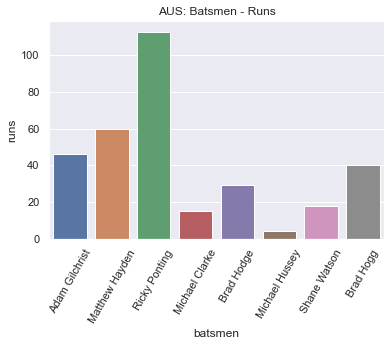

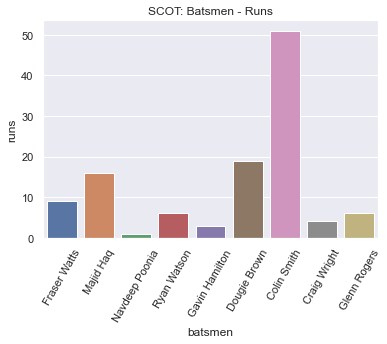

    team         batsmen runs
0    AUS  Adam Gilchrist   46
1    AUS  Matthew Hayden   60
2    AUS   Ricky Ponting  113
3    AUS  Michael Clarke   15
4    AUS      Brad Hodge   29
5    AUS  Michael Hussey    4
6    AUS    Shane Watson   18
7    AUS       Brad Hogg   40
8   SCOT    Fraser Watts    9
9   SCOT       Majid Haq   16
10  SCOT  Navdeep Poonia    1
11  SCOT     Ryan Watson    6
12  SCOT  Gavin Hamilton    3
13  SCOT    Dougie Brown   19
14  SCOT     Colin Smith   51
15  SCOT    Craig Wright    4
16  SCOT    Glenn Rogers    6


In [55]:
player_runs = get_player_runs(cricket_data)
print(player_runs)

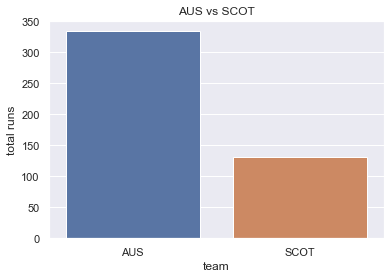

   team total runs
0   AUS        334
1  SCOT        131


In [56]:
match_team_scores = get_inning_runs(cricket_data)
print(match_team_scores)
